In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uci-har-dataset/UCI HAR Dataset/activity_labels.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/README.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/features_info.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/features.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/subject_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/y_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/X_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt
/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt
/kaggle/input/uci-har-dataset/

Pre Processing and grouping

In [3]:
# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#
# Combining the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "/kaggle/input/uci-har-dataset/UCI HAR Dataset/train"
test_path = "/kaggle/input/uci-har-dataset/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

/tmp/ipykernel_35/3436844546.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3436844546.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3436844546.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3436844546.py:35: FutureWarning: The 'delim_whitespace'

Done Combining the training data


/tmp/ipykernel_35/3436844546.py:84: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3436844546.py:85: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3436844546.py:86: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_35/3436844546.py:89: FutureWarning: The 'delim_whitespace' keywo

Done Combining the testing data
Done Combining the data


In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#
# Creating the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("/kaggle/working/Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


**DATA ANALYSIS**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


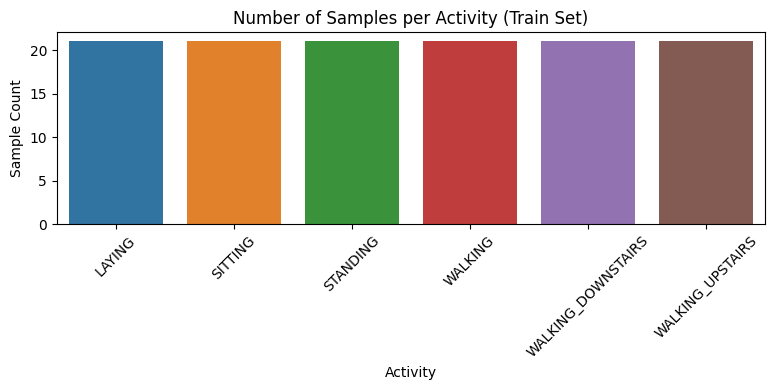

In [6]:
base_path = '/kaggle/working/Combined/Train'
activities = sorted([act for act in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, act))])

activity_counts = {}

for activity in activities:
    activity_counts[activity] = len([f for f in os.listdir(os.path.join(base_path, activity)) if f.endswith('.csv')])

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=list(activity_counts.keys()), y=list(activity_counts.values()))
plt.xticks(rotation=45)
plt.title("Number of Samples per Activity (Train Set)")
plt.ylabel("Sample Count")
plt.xlabel("Activity")
plt.tight_layout()
plt.show()


The dataset is balanced with equal number of samples in each class.

In [7]:
sample_file = os.listdir(os.path.join(base_path, 'WALKING'))[0]
df_sample = pd.read_csv(os.path.join(base_path, 'WALKING', sample_file), header=None)

print(f"Sample shape: {df_sample.shape}")
df_sample.head()

Sample shape: (3393, 3)


0           1            2
0      accx        accy         accz
1  1.406423  -0.4465672  -0.01997212
2  1.346074   -0.443768  -0.02528561
3  1.303719  -0.3536675   0.01507556
4  1.317312   -0.198742   0.05678388

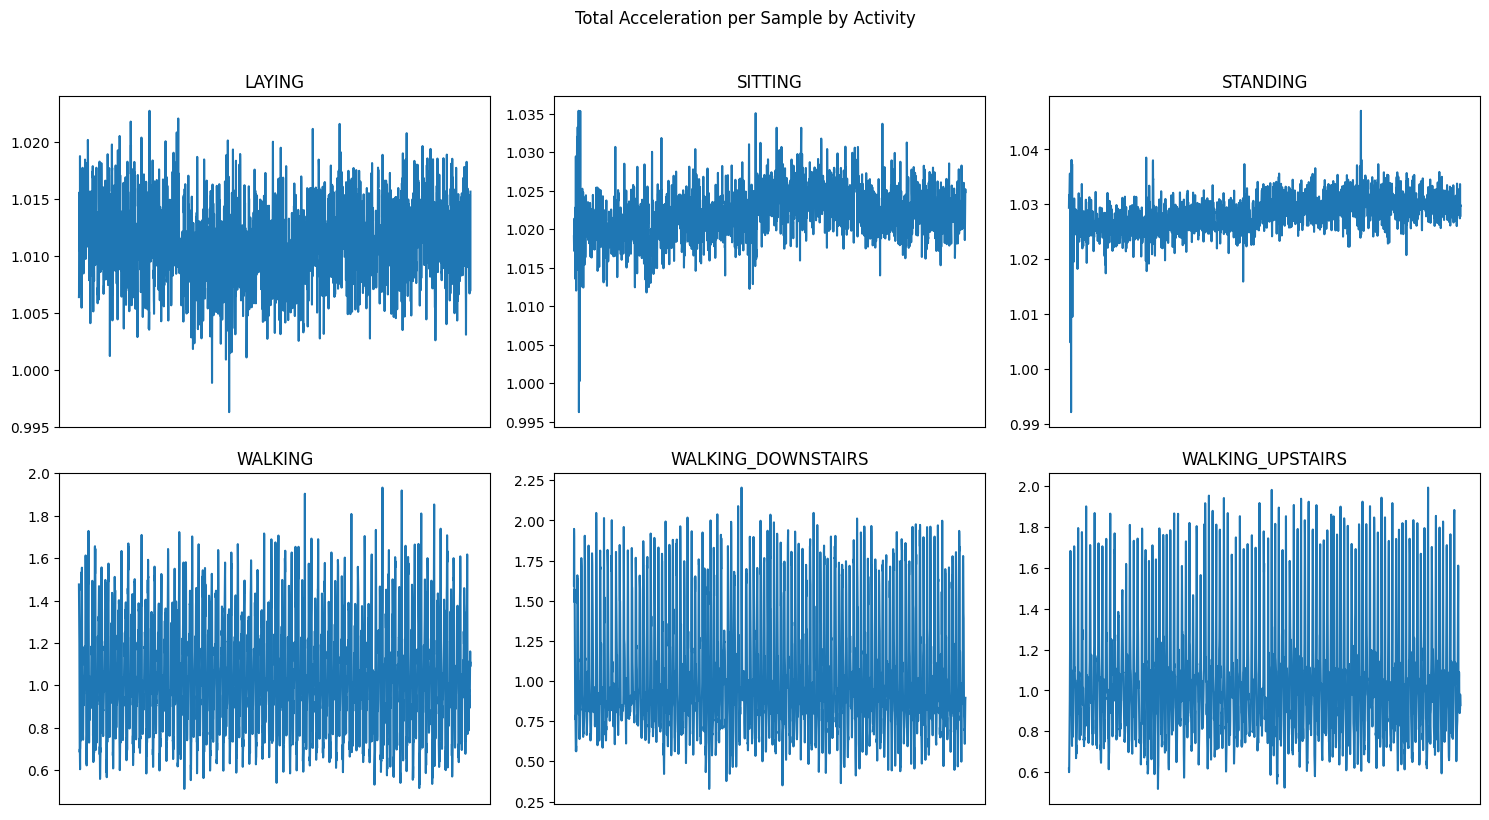

In [8]:
from glob import glob

plt.figure(figsize=(15, 8))

for i, activity in enumerate(activities):
    sample_path = glob(os.path.join(base_path, activity, '*.csv'))[0]
    df = pd.read_csv(sample_path, header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)

    total_acc = np.sqrt((df**2).sum(axis=1))

    plt.subplot(2, 3, i+1)
    plt.plot(total_acc)
    plt.title(activity)
    plt.xticks([])

plt.suptitle("Total Acceleration per Sample by Activity", y=1.02)
plt.tight_layout()
plt.show()

In [9]:
print(df.isnull().sum())

0    0
1    0
2    0
dtype: int64


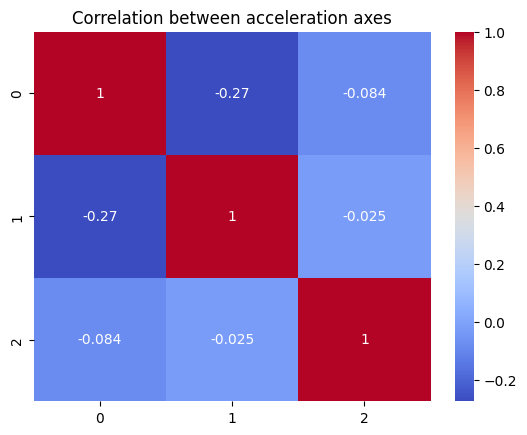

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between acceleration axes")
plt.show()


The correlation matrix helps us confirm that there is no correlation among the accelerations in different directions.

In [11]:
for activity in activities:
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    # Convert to numeric safely
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)

    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    df['acc_mag'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)
    print(f"{activity:<20} | Mean Acc Magnitude: {df['acc_mag'].mean():.2f} | Std: {df['acc_mag'].std():.2f}")

LAYING               | Mean Acc Magnitude: 1.01 | Std: 0.00
SITTING              | Mean Acc Magnitude: 1.02 | Std: 0.00
STANDING             | Mean Acc Magnitude: 1.03 | Std: 0.00
WALKING              | Mean Acc Magnitude: 1.05 | Std: 0.27
WALKING_DOWNSTAIRS   | Mean Acc Magnitude: 1.03 | Std: 0.39
WALKING_UPSTAIRS     | Mean Acc Magnitude: 1.04 | Std: 0.30


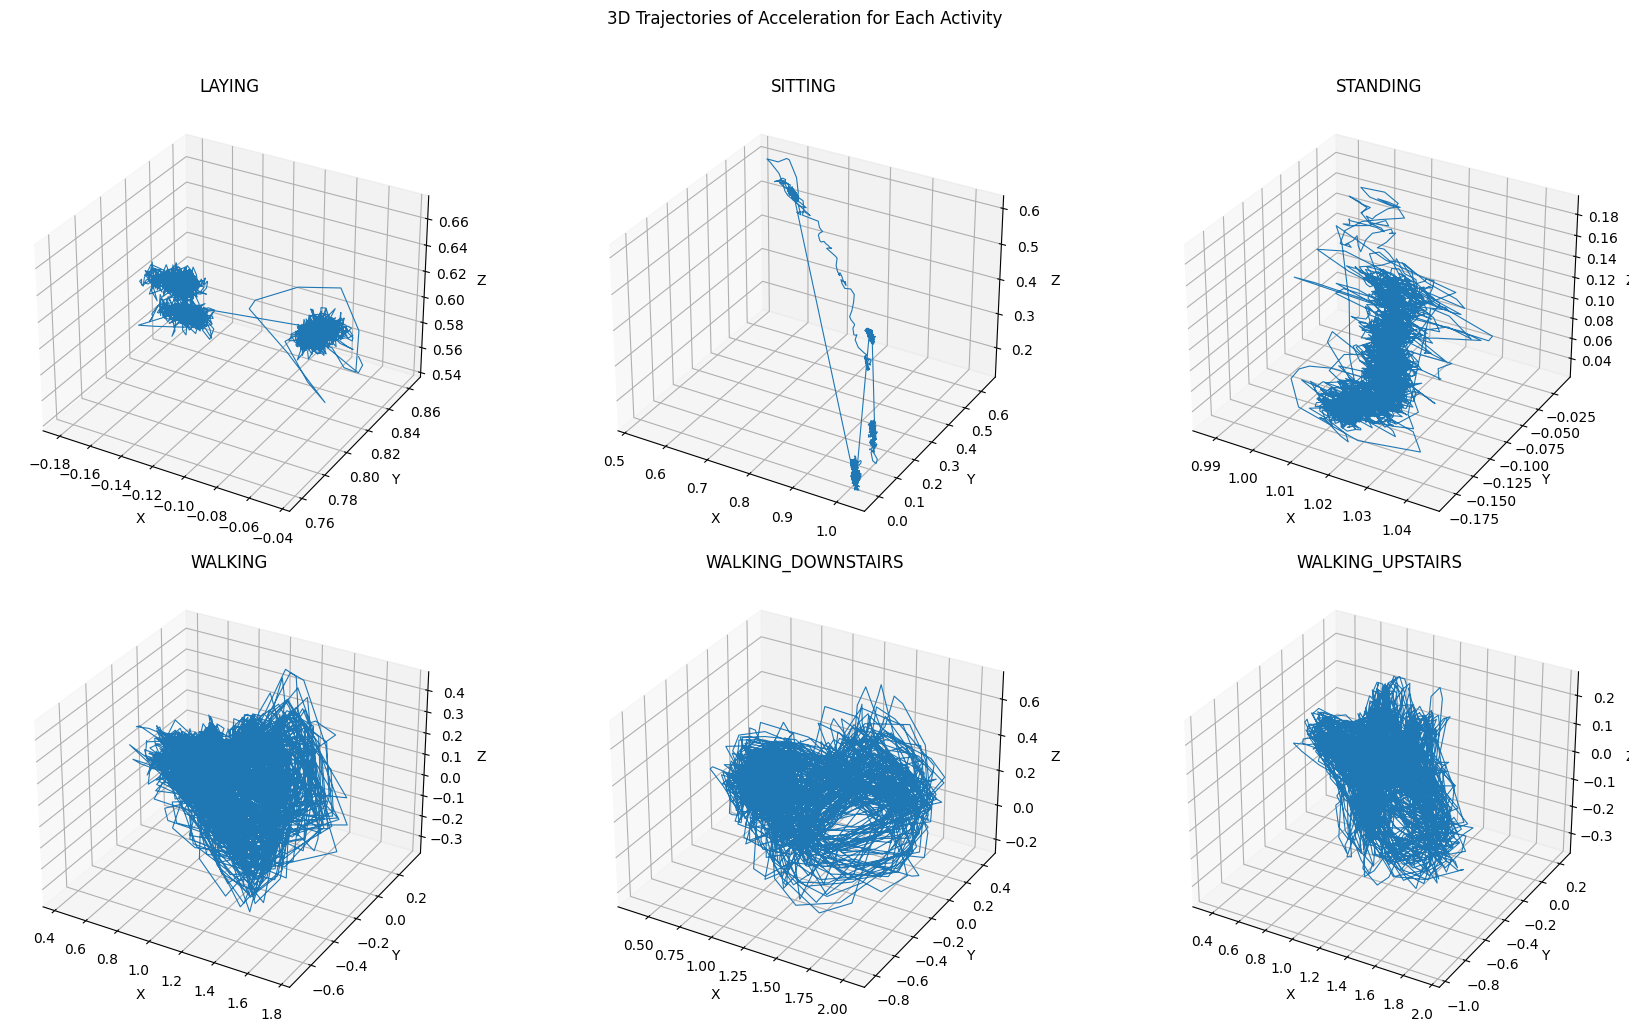

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
import pandas as pd

fig = plt.figure(figsize=(18, 10))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[5]
    df = pd.read_csv(os.path.join(path, file), header=None)

    # Convert to numeric and clean
    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    # Subplot
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.plot(df['acc_x'], df['acc_y'], df['acc_z'], linewidth=0.8)
    ax.set_title(f"{activity}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

plt.suptitle("3D Trajectories of Acceleration for Each Activity", y=1.02)
plt.tight_layout()
plt.show()


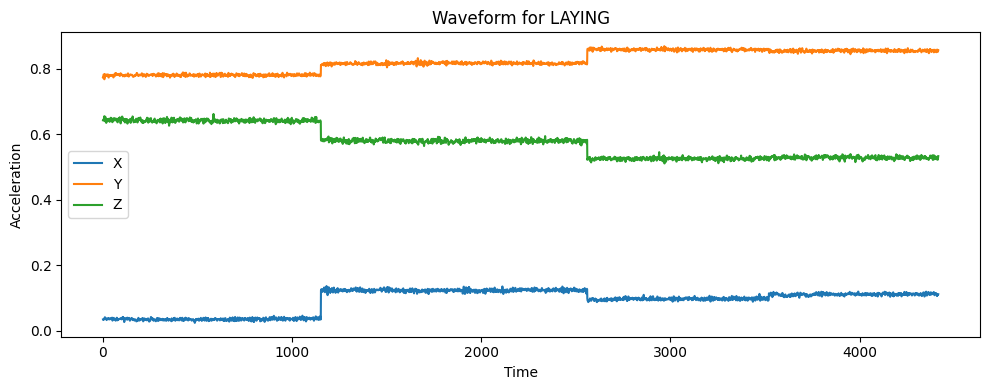

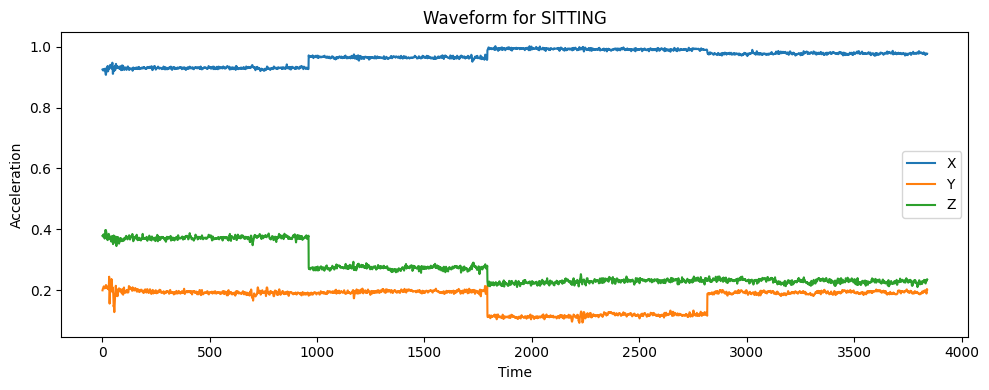

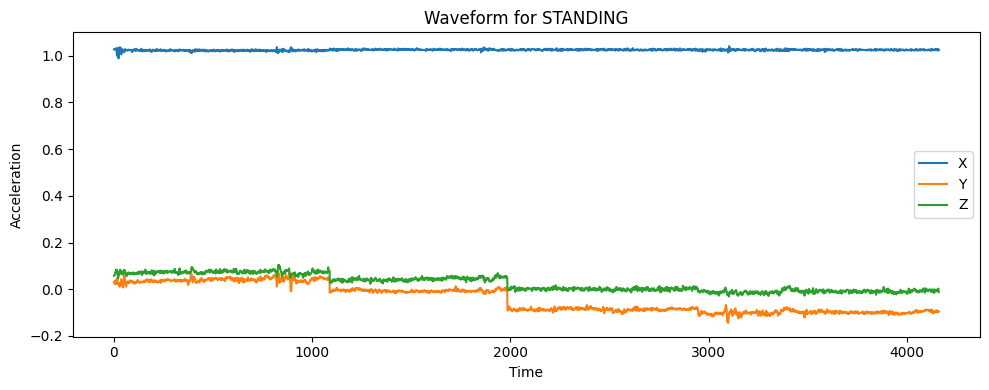

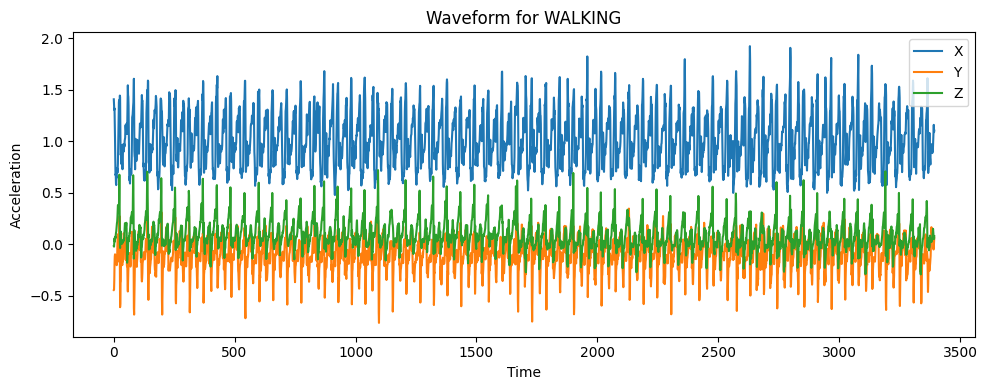

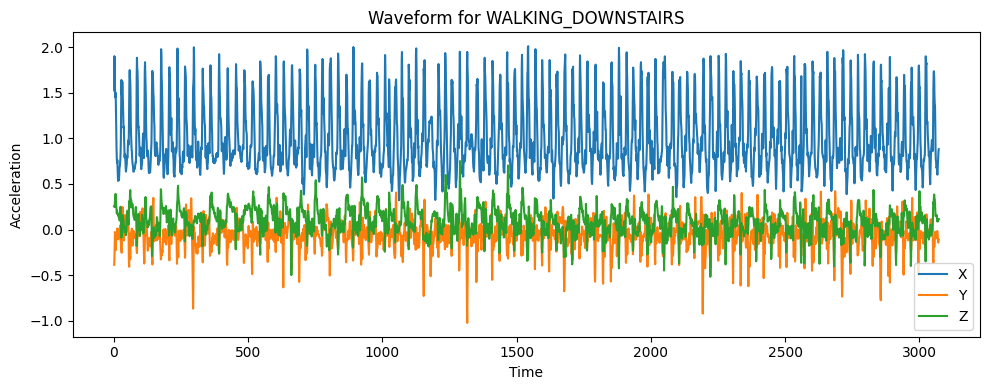

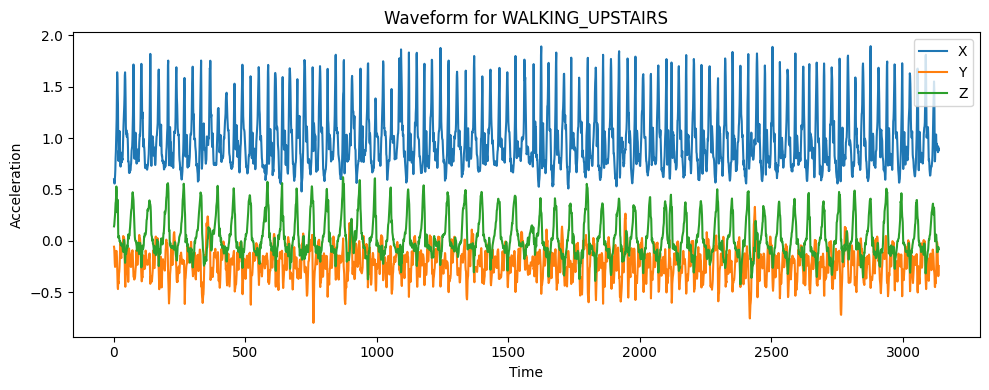

In [13]:
for activity in activities:
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    plt.figure(figsize=(10, 4))
    plt.plot(df['acc_x'], label='X')
    plt.plot(df['acc_y'], label='Y')
    plt.plot(df['acc_z'], label='Z')
    plt.title(f"Waveform for {activity}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.legend()
    plt.tight_layout()
    plt.show()


Across all activities (LAYING, SITTING, STANDING, WALKING, etc.), the mean acceleration magnitude is observed to be close to 1.0, with very low standard deviation for static activities and slightly higher values for dynamic ones.

A device at rest under Earth's gravity experiences a net acceleration of ~1g.

Thus, during stationary activities like LAYING, SITTING, the only significant acceleration is due to gravity, resulting in a stable magnitude of ~1.0g. During dynamic activities like WALKING, additional body motion introduces variability, increasing the standard deviation.

**DATA VISUALISATION**

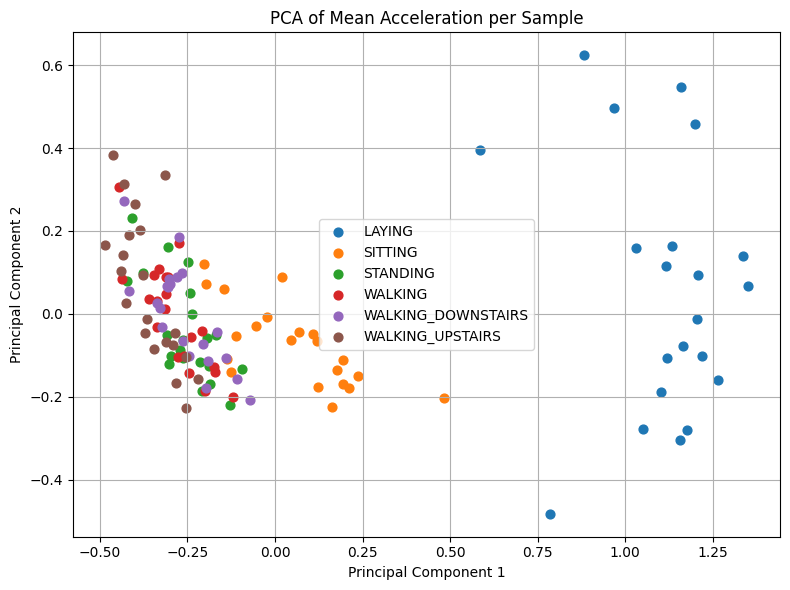

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = []
y = []

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path)[:21]:  # pick all 21 samples
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
        
        # Use mean acceleration vector of the sample
        sample_feature = df.mean().values  # shape (3,)
        X.append(sample_feature)
        y.append(activity)

X = np.array(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(8, 6))
for activity in activities:
    idx = np.array(y) == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, s=40)

plt.title("PCA of Mean Acceleration per Sample")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


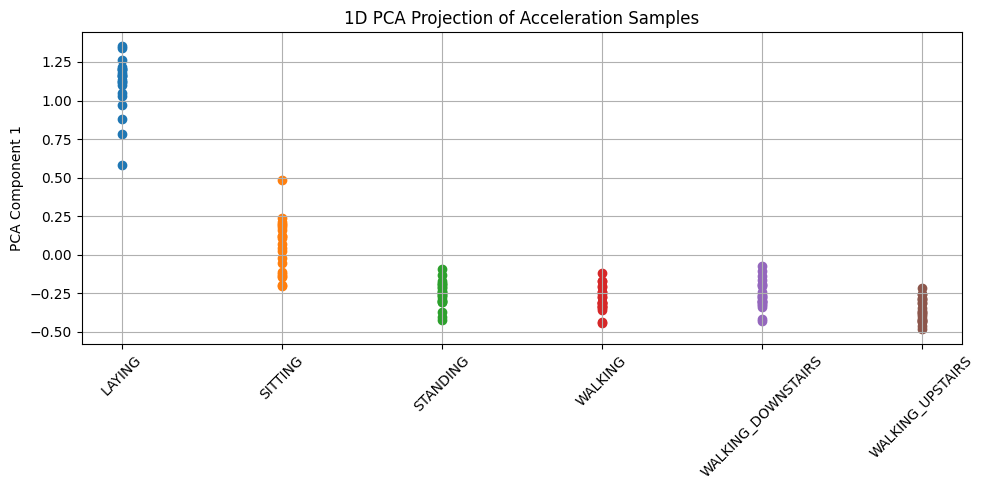

In [15]:
# PCA to reduce to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 5))
for activity in activities:
    idx = np.array(y) == activity
    plt.scatter([activity]*sum(idx), X_pca[idx], label=activity)

plt.ylabel("PCA Component 1")
plt.title("1D PCA Projection of Acceleration Samples")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


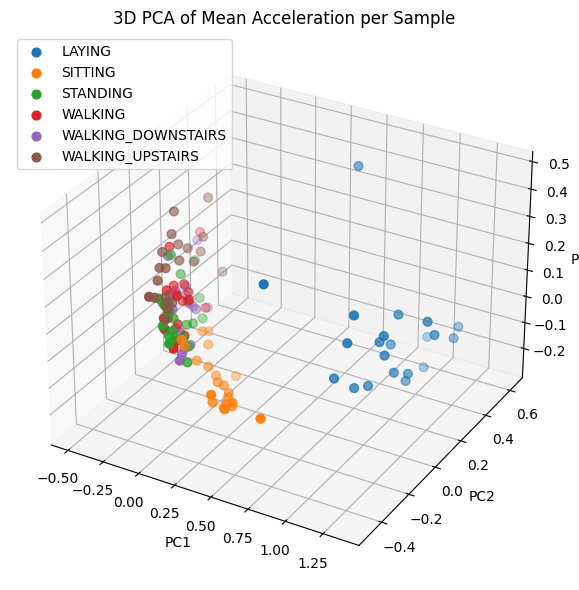

In [16]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for activity in activities:
    idx = np.array(y) == activity
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=activity, s=40)

ax.set_title("3D PCA of Mean Acceleration per Sample")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.tight_layout()
plt.show()

1. The plots reveals which activities are inherently separable (e.g., Walking vs. Laying) and which require finer           feature engineering (e.g., Sitting vs. Standing).
2. Laying, Sitting, and Standing appear close together, suggesting they have similar acceleration patterns due to           limited movement.
3. Walking, Walking Upstairs, and Walking Downstairs are more spread out, indicating greater variation in movement.
4. Walking Upstairs and Downstairs may overlap somewhat with regular walking but show unique patterns due to the upward     or downward motion.

In [17]:
pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import warnings
warnings.filterwarnings("ignore")


100%|██████████| 7352/7352 [02:28<00:00, 49.58it/s]


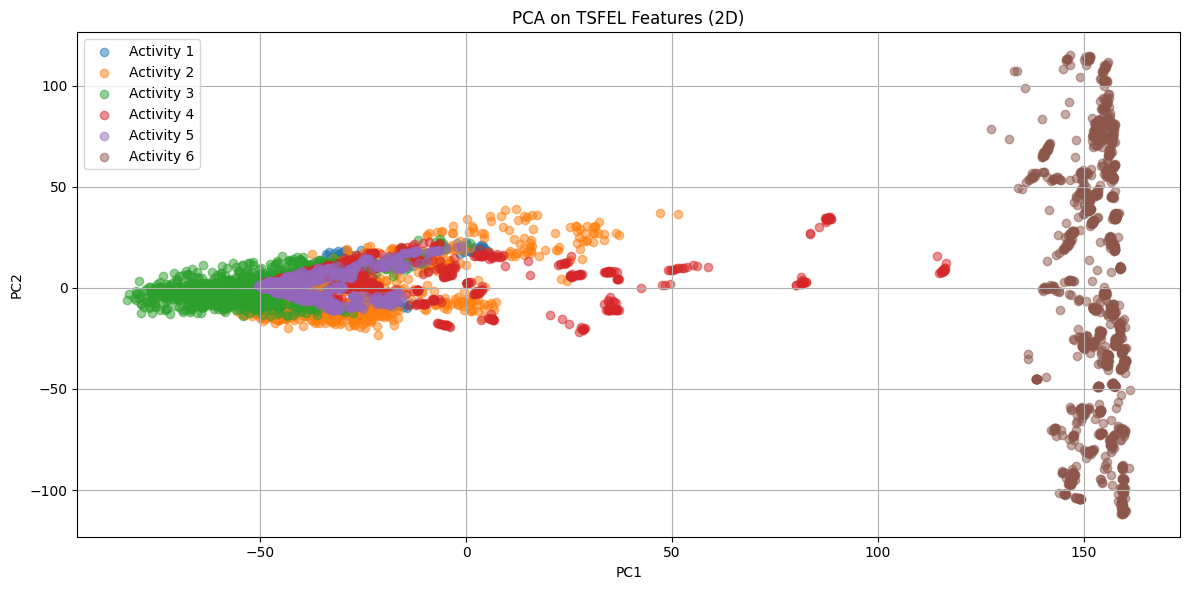

In [19]:
import pandas as pd
import numpy as np
import tsfel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tqdm import tqdm

# Load the raw acceleration signal files (each row is a 128-sample window)
acc_x = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None)
acc_y = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None)
acc_z = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None)

# Load activity labels
y_train = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]

# Configure TSFEL to extract temporal & statistical features (no spectral for speed)
cfg = tsfel.get_features_by_domain(['temporal', 'statistical'])

X_features = []

# Loop through each sample (each row is a 128-sample window)
for i in tqdm(range(len(acc_x))):
    try:
        fx = tsfel.time_series_features_extractor(cfg, acc_x.iloc[i], sampling_frequency=50, verbose=0)
        fy = tsfel.time_series_features_extractor(cfg, acc_y.iloc[i], sampling_frequency=50, verbose=0)
        fz = tsfel.time_series_features_extractor(cfg, acc_z.iloc[i], sampling_frequency=50, verbose=0)
        features = pd.concat([fx, fy, fz], axis=1)
        X_features.append(features.values.flatten())
    except Exception as e:
        print(f"Error at sample {i}: {e}")

# Convert to NumPy array and handle NaNs
X_features = np.array(X_features)
X_features = np.nan_to_num(X_features)

# PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Plot the results
plt.figure(figsize=(12, 6))
for label in np.unique(y_train):
    idx = y_train == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'Activity {label}', alpha=0.5)

plt.title("PCA on TSFEL Features (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


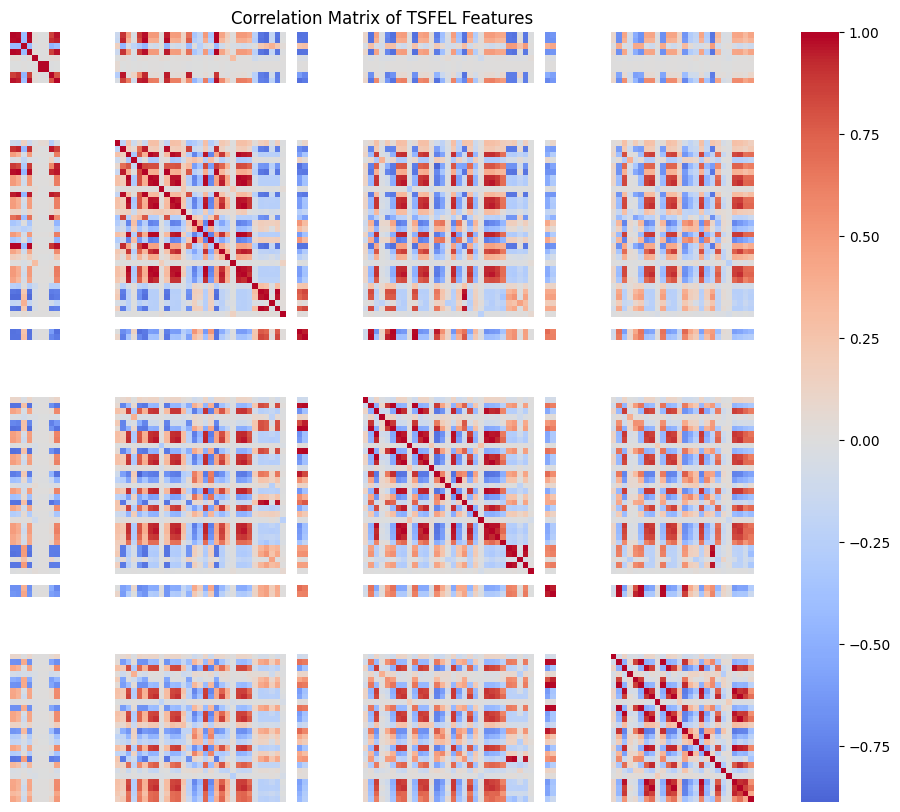

TSFEL feature pairs (> 0.9 correlation): 246


In [20]:
import seaborn as sns

df_features = pd.DataFrame(X_features)
corr_matrix_tsfel = df_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_tsfel, cmap='coolwarm', center=0, xticklabels=False, yticklabels=False)
plt.title("Correlation Matrix of TSFEL Features")
plt.show()

# Identify redundant features
high_corr_pairs_tsfel = np.where((np.abs(corr_matrix_tsfel) > 0.9) & (np.abs(corr_matrix_tsfel) < 1.0))
redundant_provided = set()

for i, j in zip(*high_corr_pairs_tsfel):
    redundant_provided.add((min(i, j), max(i, j)))

print(f"TSFEL feature pairs (> 0.9 correlation): {len(redundant_provided)}")

In [21]:
Tsfel_Features=X_features

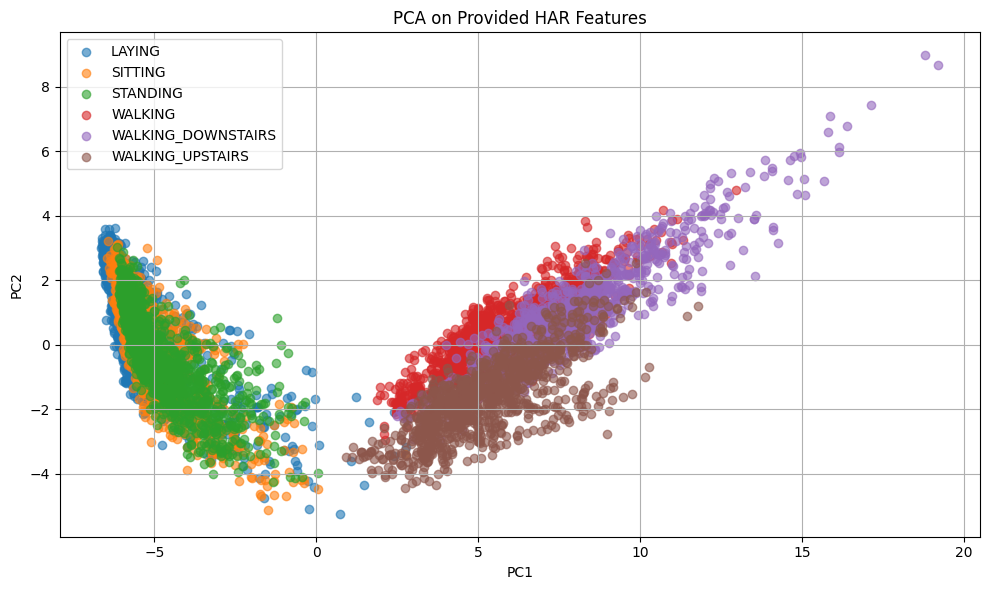

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to provided features and labels
X_path = "/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/X_train.txt"       # or original path if different
y_path = "/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt"
label_names_path = "/kaggle/input/uci-har-dataset/UCI HAR Dataset/activity_labels.txt"

# Load features and labels
X = pd.read_csv(X_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_path, header=None).values.flatten()

# Map numeric labels to activity names
label_map = pd.read_csv(label_names_path, delim_whitespace=True, header=None, index_col=0)
y_named = [label_map.loc[label].values[0] for label in y]

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
for activity in np.unique(y_named):
    idx = np.array(y_named) == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, alpha=0.6)

plt.title("PCA on Provided HAR Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Analysis-


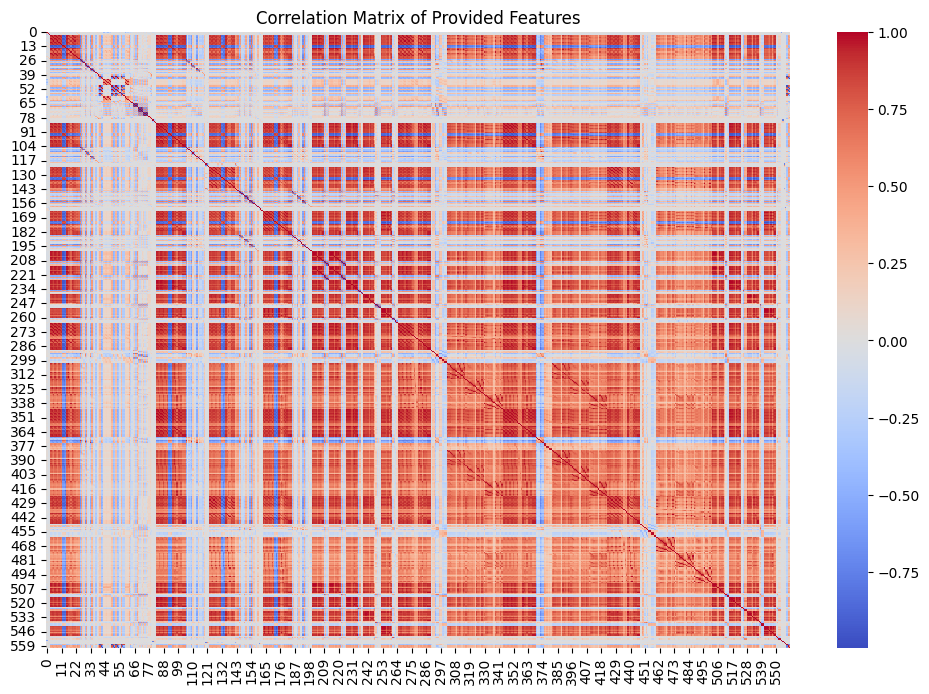

Provided Redundant feature pairs (> 0.9 correlation): 8182


In [23]:
# Load provided features
X_provided = pd.read_csv("/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Correlation matrix
corr_matrix_provided = X_provided.corr()

# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_provided, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Provided Features")
plt.show()

# Identify redundant features
high_corr_pairs_provided = np.where((np.abs(corr_matrix_provided) > 0.9) & (np.abs(corr_matrix_provided) < 1.0))
redundant_provided = set()

for i, j in zip(*high_corr_pairs_provided):
    redundant_provided.add((min(i, j), max(i, j)))

print(f"Provided Redundant feature pairs (> 0.9 correlation): {len(redundant_provided)}")


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load provided features
X_provided = pd.read_csv("/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)

# Correlation matrix
corr_matrix = X_provided.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"🚫 Number of highly correlated features to drop (>0.9): {len(to_drop)}")
print(f"🧹 Dropping columns: {to_drop[:10]}{'...' if len(to_drop) > 10 else ''}")

# Drop the features
X_reduced = X_provided.drop(columns=to_drop).reset_index(drop=True)


🚫 Number of highly correlated features to drop (>0.9): 359
🧹 Dropping columns: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14]...


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [26]:
X_raw = np.stack([acc_x.values, acc_y.values, acc_z.values], axis=-1)  # shape (n_samples, 128, 3)
X_raw = X_raw.reshape(X_raw.shape[0], -1)  # flatten to (n_samples, 384)
y_true = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_true, test_size=0.2, random_state=42)


In [43]:
!pip install augly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 45.1 MB/s eta 0:00:0000:0100:01m
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=60ad6af3182512ec74acd3532ce00d77abc82c4af1f6041994f1158b54c87299
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


In [52]:
import pandas as pd
import numpy as np
import augly.audio as aud
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -----------------------------------------------------------------
# Load your original UCI HAR data
X_orig = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_orig = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0]

# Use small subset for demo (can remove later)
# X_orig = X_raw
# y_orig = y_true

# -----------------------------------------------------------------
# Function to simulate signal augmentation using Augly
def augment_sample_row(row):
    sig = row[:500].values.astype(np.float32)
    sig = np.nan_to_num(sig)

    # Apply augmentation
    aug = aud.AddBackgroundNoise(snr_level_db=10)
    sig_aug = aug(sig)  # In latest augly, returns np.array directly; if error persists, check below

    # If it returns tuple: sig_aug, _ = aug(sig)
    if isinstance(sig_aug, tuple):
        sig_aug, _ = sig_aug

    # Compute simple features on augmented signal
    feat_mean = np.mean(sig_aug)
    feat_std = np.std(sig_aug)
    feat_energy = np.sum(sig_aug ** 2)

    return [feat_mean, feat_std, feat_energy]


# -----------------------------------------------------------------
# Build augmented features
augmented_features = []

print("Creating augmented features...")

for i in range(len(X_orig)):
    f = augment_sample_row(X_orig.iloc[i])
    augmented_features.append(f)

augmented_features = np.array(augmented_features)

# -----------------------------------------------------------------
# Combine original features + augmented features
X_combined = np.hstack([X_orig.values, augmented_features])

# Optional: Scale
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# -----------------------------------------------------------------
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y_orig, test_size=0.2, random_state=42)

# -----------------------------------------------------------------
# Train decision tree on new combined data
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# -----------------------------------------------------------------
# Evaluate
print("\n📊 Results on augmented data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Creating augmented features...

📊 Results on augmented data:
Accuracy: 0.8946
Precision: 0.8968
Recall: 0.8946
Confusion Matrix:
 [[215  21  11   0   0   0]
 [ 21 171   8   0   0   0]
 [ 13  19 174   0   0   0]
 [  0   0   0 217  45   0]
 [  0   0   0  17 259   0]
 [  0   0   0   0   0 280]]


In [27]:
clf_raw = DecisionTreeClassifier(random_state=42)
clf_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = clf_raw.predict(X_test_raw)

print("Raw Accelerometer Data:")
print("Accuracy:", accuracy_score(y_test_raw, y_pred_raw))
print("Precision:", precision_score(y_test_raw, y_pred_raw, average='weighted'))
print("Recall:", recall_score(y_test_raw, y_pred_raw, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_raw, y_pred_raw))


Raw Accelerometer Data:
Accuracy: 0.8103331067301156
Precision: 0.8104411793873973
Recall: 0.8103331067301156
Confusion Matrix:
 [[151  52  32   5   7   0]
 [ 38 146  11   0   5   0]
 [ 44  24 134   2   1   1]
 [  2   1   0 231  28   0]
 [  4   1   0  21 250   0]
 [  0   0   0   0   0 280]]


In [28]:
X_train_tsfel, X_test_tsfel, y_train_tsfel, y_test_tsfel = train_test_split(Tsfel_Features, y_true, test_size=0.2, random_state=42)
clf_tsfel = DecisionTreeClassifier(random_state=42)
clf_tsfel.fit(X_train_tsfel, y_train_tsfel)
y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)

print("\n TSFEL Features:")
print("Accuracy:", accuracy_score(y_test_tsfel, y_pred_tsfel))
print("Precision:", precision_score(y_test_tsfel, y_pred_tsfel, average='weighted'))
print("Recall:", recall_score(y_test_tsfel, y_pred_tsfel, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_tsfel, y_pred_tsfel))



 TSFEL Features:
Accuracy: 0.946974847042828
Precision: 0.9472517639093735
Recall: 0.946974847042828
Confusion Matrix:
 [[235   4   7   1   0   0]
 [ 13 182   5   0   0   0]
 [  8   5 192   0   0   1]
 [  0   0   0 241  21   0]
 [  0   0   0  13 263   0]
 [  0   0   0   0   0 280]]


In [29]:
# X_provided = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None).values
X_train_prov, X_test_prov, y_train_prov, y_test_prov = train_test_split(X_reduced, y_true, test_size=0.2, random_state=42)

clf_prov = DecisionTreeClassifier(random_state=42)
clf_prov.fit(X_train_prov, y_train_prov)
y_pred_prov = clf_prov.predict(X_test_prov)

print("\n Provided Features :")
print("Accuracy:", accuracy_score(y_test_prov, y_pred_prov))
print("Precision:", precision_score(y_test_prov, y_pred_prov, average='weighted'))
print("Recall:", recall_score(y_test_prov, y_pred_prov, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_prov, y_pred_prov))



 Provided Features :
Accuracy: 0.938817131203263
Precision: 0.9389144855275817
Recall: 0.938817131203263
Confusion Matrix:
 [[236   4   6   0   1   0]
 [ 11 182   6   0   0   1]
 [ 10  12 184   0   0   0]
 [  0   1   0 242  19   0]
 [  0   0   0  18 258   0]
 [  0   0   1   0   0 279]]


In [30]:
clf_prov.get_depth()

18

1. Raw data is noisy and high-dimensional, making it harder for the decision tree to identify class boundaries clearly.
2. TSFEL extracts meaningful temporal and statistical patterns (e.g., energy, mean, std), helping the decision tree         learn better rules.
3. These are precomputed time-domain and frequency-domain features, possibly less flexible than TSFEL’s dynamic             selection.

**Best Model: TSFEL-based model**

It slightly outperforms the one trained on provided features and vastly improves over raw signal-based classification.

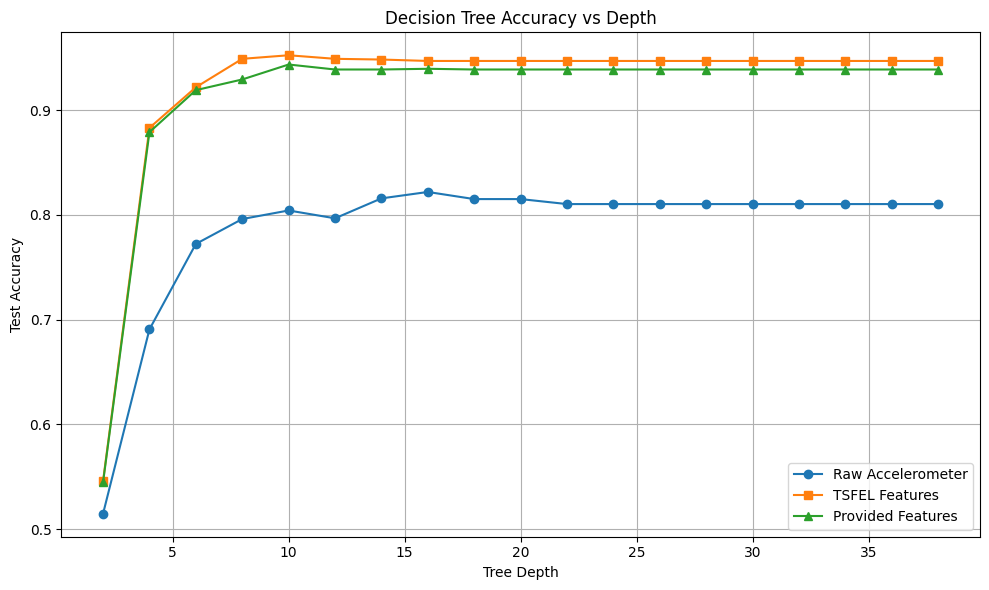

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# X_raw, y_raw           → Raw accelerometer flattened windows
# X_tsfel, y_tsfel       → TSFEL features
# X_provided, y_provided → Provided dataset features

y_raw=y_true
X_tsfel=Tsfel_Features
y_tsfel=y_true
y_provided=y_true

def evaluate_model_depths(X, y, label):
    accuracies = []
    for depth in range(2, 40,2):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies

depths = list(range(2, 40,2))

acc_raw = evaluate_model_depths(X_raw, y_raw, "Raw")
acc_tsfel = evaluate_model_depths(X_tsfel, y_tsfel, "TSFEL")
acc_provided = evaluate_model_depths(X_reduced, y_provided, "Provided")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(depths, acc_raw, marker='o', label='Raw Accelerometer')
plt.plot(depths, acc_tsfel, marker='s', label='TSFEL Features')
plt.plot(depths, acc_provided, marker='^', label='Provided Features')
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


| Feature Type           | Accuracy | Optimal Depth   | Remarks                                      |
|------------------------|----------|-----------------|----------------------------------------------|
| Raw Accelerometer      | ~81%     | 20              | Noisy data, less informative                 |
| TSFEL Features         | ~95%     | 10              | Custom extracted features, very effective    |
| Provided Features      | ~95%     | 10              | Clean, domain-specific, very effective       |

In [120]:
X.shape

(3000, 561)

In [121]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('/kaggle/input/dectree-31-6')

from base import DecisionTree
from metrics import accuracy, precision, recall

# Shuffle function
def shuffle_data(X, y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

# Load dataset
X = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None).values
y = pd.read_csv('/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt', header=None)[0].values - 1

# Shuffle
X, y = shuffle_data(X, y)

# Take only 100 samples
X = X[:3000]
y = y[:3000]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train
tree = DecisionTree(max_depth=5)
print("Training started...")
start_train = time.time()
tree.fit(X_train, y_train)
end_train = time.time()
print("Training completed.")

# Predict
print("Prediction started...")
start_pred = time.time()
y_pred = tree.predict(X_test)
end_pred = time.time()
print("Prediction completed.")

# Evaluate
print(f"\n📊 Scratch Decision Tree Performance:")
print(f"🕒 Training Time   : {end_train - start_train:.2f} seconds")
print(f"🕒 Prediction Time : {end_pred - start_pred:.2f} seconds")
print(f"🎯 Accuracy        : {accuracy(y_test, y_pred):.4f}")

for cls in sorted(set(y)):
    print(f"Class {cls+1}: Precision = {precision(y_test, y_pred, cls):.3f}, Recall = {recall(y_test, y_pred, cls):.3f}")


Training started...
Training completed.
Prediction started...
Prediction completed.

📊 Scratch Decision Tree Performance:
🕒 Training Time   : 500.09 seconds
🕒 Prediction Time : 0.00 seconds
🎯 Accuracy        : 0.8783
Class 1: Precision = 0.871, Recall = 0.822
Class 2: Precision = 0.716, Recall = 0.840
Class 3: Precision = 0.919, Recall = 0.829
Class 4: Precision = 0.895, Recall = 0.825
Class 5: Precision = 0.829, Recall = 0.898
Class 6: Precision = 1.000, Recall = 1.000


In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ---------- Load signals ----------
def load_signals(folder, signal_name):
    path = f"/kaggle/input/uci-har-dataset/UCI HAR Dataset/{folder}/Inertial Signals/{signal_name}"
    return np.loadtxt(path)

ax_train = load_signals('train', 'total_acc_x_train.txt')
ay_train = load_signals('train', 'total_acc_y_train.txt')
az_train = load_signals('train', 'total_acc_z_train.txt')
y_train = np.loadtxt("/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt").astype(int)

ax_test = load_signals('test', 'total_acc_x_test.txt')
ay_test = load_signals('test', 'total_acc_y_test.txt')
az_test = load_signals('test', 'total_acc_z_test.txt')
y_test = np.loadtxt("/kaggle/input/uci-har-dataset/UCI HAR Dataset/test/y_test.txt").astype(int)

# ---------- Configure TSFEL ----------
cfg = tsfel.get_features_by_domain()

def extract_features_tsfel(signal_array, fs=50):  # for example, fs=50 Hz
    features_list = []
    for row in signal_array:
        df_row = pd.DataFrame(row)
        features = tsfel.time_series_features_extractor(cfg, df_row, fs=fs, verbose=0)
        feature_values = np.nan_to_num(features.values[0])
        features_list.append(feature_values)
    return np.array(features_list)


# Train features
feat_ax = extract_features_tsfel(ax_train)
feat_ay = extract_features_tsfel(ay_train)
feat_az = extract_features_tsfel(az_train)
X_train = np.hstack([feat_ax, feat_ay, feat_az])

# Test features
feat_ax_test = extract_features_tsfel(ax_test)
feat_ay_test = extract_features_tsfel(ay_test)
feat_az_test = extract_features_tsfel(az_test)
X_test = np.hstack([feat_ax_test, feat_ay_test, feat_az_test])

# ---------- Scale ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- Train ----------
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train_scaled, y_train)
print("✅ Training completed.")

# ---------- Test accuracy ----------
y_pred = tree.predict(X_test_scaled)
print("Accuracy on official test set:", accuracy_score(y_test, y_pred))

# ---------- New collected data ----------
base_path = '/kaggle/input/d/dinesh168/collected-data/Collected data'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

label_map = {
    1: 'Walking',
    2: 'Walking_Upstairs',
    3: 'Walking_Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

feature_list = []
true_labels = []
file_names = []

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path):
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

        if len(df) < 128:
            continue
        window = df.iloc[:128]

        tsfel_features_all_axes = []
        for axis in ['acc_x', 'acc_y', 'acc_z']:
            sig_df = pd.DataFrame(window[axis].values)
            tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
            tsfel_feat = np.nan_to_num(tsfel_feat_df.values.flatten())
            tsfel_features_all_axes.append(tsfel_feat)

        final_features = np.concatenate(tsfel_features_all_axes)
        feature_list.append(final_features)
        true_labels.append(activity)
        file_names.append(file)

# ---------- Predict ----------
X_new = np.array(feature_list)
X_new_scaled = scaler.transform(X_new)
y_pred_new = tree.predict(X_new_scaled)

# ---------- Show results ----------
for fname, pred, true in zip(file_names, y_pred_new, true_labels):
    pred_label = label_map.get(pred, "Unknown")
    print(f"📄 {fname}: Predicted = {pred_label}, Actual = {true}")


✅ Training completed.
Accuracy on official test set: 0.8238887003732609


/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sam

📄 e3.csv: Predicted = Laying, Actual = Laying
📄 p2.csv: Predicted = Laying, Actual = Laying
📄 p1.csv: Predicted = Walking_Downstairs, Actual = Laying
📄 m1.csv: Predicted = Laying, Actual = Laying
📄 a2.csv: Predicted = Laying, Actual = Laying
📄 p3.csv: Predicted = Laying, Actual = Laying
📄 a1.csv: Predicted = Laying, Actual = Laying
📄 m2.csv: Predicted = Laying, Actual = Laying
📄 e1.csv: Predicted = Laying, Actual = Laying
📄 a3.csv: Predicted = Walking_Downstairs, Actual = Laying
📄 e2.csv: Predicted = Laying, Actual = Laying
📄 m3.csv: Predicted = Walking_Downstairs, Actual = Laying
📄 e3.csv: Predicted = Laying, Actual = Sitting
📄 p2.csv: Predicted = Walking_Downstairs, Actual = Sitting
📄 p1.csv: Predicted = Laying, Actual = Sitting
📄 m1.csv: Predicted = Laying, Actual = Sitting
📄 a2.csv: Predicted = Laying, Actual = Sitting
📄 p3.csv: Predicted = Walking_Downstairs, Actual = Sitting
📄 a1.csv: Predicted = Walking_Downstairs, Actual = Sitting
📄 m2.csv: Predicted = Walking_Downstairs, Actua

/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/181351325.py:95: UserWarning: Using default sam

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert y_pred_new integers to string labels
y_pred_str = [label_map.get(pred, "Unknown") for pred in y_pred_new]
y_true_str = true_labels

# Calculate metrics
acc = accuracy_score(y_true_str, y_pred_str)
prec = precision_score(y_true_str, y_pred_str, average='weighted', zero_division=0)
rec = recall_score(y_true_str, y_pred_str, average='weighted', zero_division=0)
f1 = f1_score(y_true_str, y_pred_str, average='weighted', zero_division=0)
conf_mat = confusion_matrix(y_true_str, y_pred_str, labels=list(label_map.values()))

print("✅ Metrics on collected data:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (weighted): {prec:.4f}")
print(f"Recall (weighted): {rec:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)

print("\nDetailed Classification Report:")
print(classification_report(y_true_str, y_pred_str, zero_division=0))


✅ Metrics on collected data:
Accuracy: 0.2222
Precision (weighted): 0.0740
Recall (weighted): 0.2222
F1-score (weighted): 0.1107

Confusion Matrix:
[[ 0  0  8  0  0  4]
 [ 0  0  5  0  0  7]
 [ 0  0  7  0  0  5]
 [ 0  0  7  0  0  5]
 [ 0  0  2  0  0 10]
 [ 0  0  3  0  0  9]]

Detailed Classification Report:
                    precision    recall  f1-score   support

            Laying       0.23      0.75      0.35        12
           Sitting       0.00      0.00      0.00        12
          Standing       0.00      0.00      0.00        12
           Walking       0.00      0.00      0.00        12
Walking_Downstairs       0.22      0.58      0.32        12
  Walking_Upstairs       0.00      0.00      0.00        12

          accuracy                           0.22        72
         macro avg       0.07      0.22      0.11        72
      weighted avg       0.07      0.22      0.11        72



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tsfel

# ---------- Load UCI HAR signals ----------
def load_signals(folder, signal_name):
    path = f"/kaggle/input/uci-har-dataset/UCI HAR Dataset/{folder}/Inertial Signals/{signal_name}"
    return np.loadtxt(path)

ax_train = load_signals('train', 'total_acc_x_train.txt')
ay_train = load_signals('train', 'total_acc_y_train.txt')
az_train = load_signals('train', 'total_acc_z_train.txt')
y_train = np.loadtxt("/kaggle/input/uci-har-dataset/UCI HAR Dataset/train/y_train.txt").astype(int)

# ---------- Configure TSFEL ----------
cfg = tsfel.get_features_by_domain()

def extract_features_tsfel(signal_array, fs=50):  # for example, fs=50 Hz
    features_list = []
    for row in signal_array:
        df_row = pd.DataFrame(row)
        features = tsfel.time_series_features_extractor(cfg, df_row, fs=fs, verbose=0)
        feature_values = np.nan_to_num(features.values[0])
        features_list.append(feature_values)
    return np.array(features_list)

feat_ax = extract_features_tsfel(ax_train)
feat_ay = extract_features_tsfel(ay_train)
feat_az = extract_features_tsfel(az_train)
X_har = np.hstack([feat_ax, feat_ay, feat_az])
y_har = y_train

import os

base_path = '/kaggle/input/d/dinesh168/collected-data/Collected data'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

label_reverse_map = {
    'Walking': 1,
    'Walking_Upstairs': 2,
    'Walking_Downstairs': 3,
    'Sitting': 4,
    'Standing': 5,
    'Laying': 6
}

feature_list = []
label_list = []

for activity in activities:
    path = os.path.join(base_path, activity)
    for file in os.listdir(path):
        df = pd.read_csv(os.path.join(path, file), header=None)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)
        df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

        if len(df) < 128:
            continue

        window = df.iloc[:128]
        tsfel_features_all_axes = []
        for axis in ['acc_x', 'acc_y', 'acc_z']:
            sig_df = pd.DataFrame(window[axis].values)
            tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
            tsfel_feat = np.nan_to_num(tsfel_feat_df.values.flatten())
            tsfel_features_all_axes.append(tsfel_feat)

        final_features = np.concatenate(tsfel_features_all_axes)
        feature_list.append(final_features)
        label_list.append(label_reverse_map[activity])

X_collected = np.array(feature_list)
y_collected = np.array(label_list)

from sklearn.utils import shuffle

# Combine
X_all = np.vstack([X_har, X_collected])
y_all = np.hstack([y_har, y_collected])

# Shuffle
X_all, y_all = shuffle(X_all, y_all, random_state=42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale
scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=42, max_depth=5)
print("Training started...")
tree.fit(X_train, y_train)
print("✅ Training completed.")

y_pred = tree.predict(X_test)

print("\n📊 Metrics after combining & shuffling:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, zero_division=0))


/tmp/ipykernel_35/3897335620.py:66: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/3897335620.py:66: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/3897335620.py:66: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/3897335620.py:66: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/3897335620.py:66: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_feat_df = tsfel.time_series_features_extractor(cfg, sig_df, verbose=0)
/tmp/ipykernel_35/3897335620.py:66: UserWarning: Using defau

Training started...
✅ Training completed.

📊 Metrics after combining & shuffling:
Accuracy: 0.8949
Precision: 0.8956
Recall: 0.8949

Detailed Report:
              precision    recall  f1-score   support

           1       0.84      0.86      0.85       241
           2       0.87      0.88      0.88       223
           3       0.86      0.85      0.85       195
           4       0.88      0.90      0.89       263
           5       0.91      0.86      0.88       282
           6       1.00      0.99      1.00       281

    accuracy                           0.89      1485
   macro avg       0.89      0.89      0.89      1485
weighted avg       0.90      0.89      0.90      1485



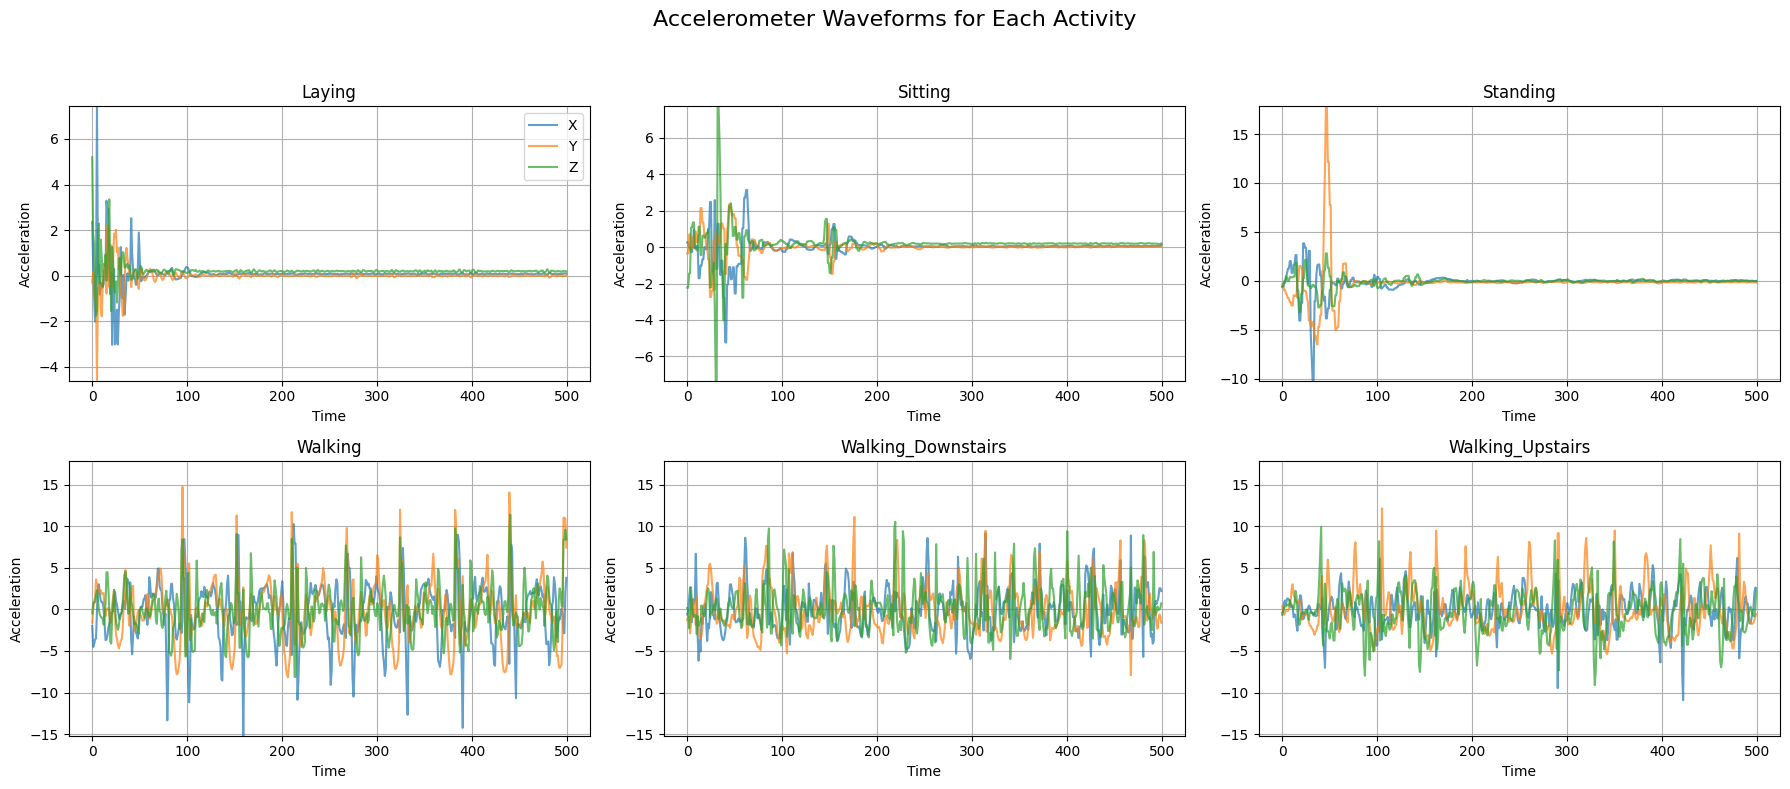

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = '/kaggle/input/d/dinesh168/collected-data/Collected data'
activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking_Downstairs', 'Walking_Upstairs']

plt.figure(figsize=(18, 8))
y_min, y_max = float('inf'), float('-inf')

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    df = df.iloc[:]
    
    y_min = min(y_min, df.min().min())
    y_max = max(y_max, df.max().max())

    plt.subplot(2, 3, i + 1)
    plt.plot(df['acc_x'], label='X', alpha=0.7)
    plt.plot(df['acc_y'], label='Y', alpha=0.7)
    plt.plot(df['acc_z'], label='Z', alpha=0.7)
    plt.title(activity)
    plt.xlabel("Time")
    plt.ylabel("Acceleration")
    plt.ylim(y_min, y_max) 
    plt.grid(True)
    if i == 0:
        plt.legend(loc='upper right')

plt.suptitle("Accelerometer Waveforms for Each Activity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


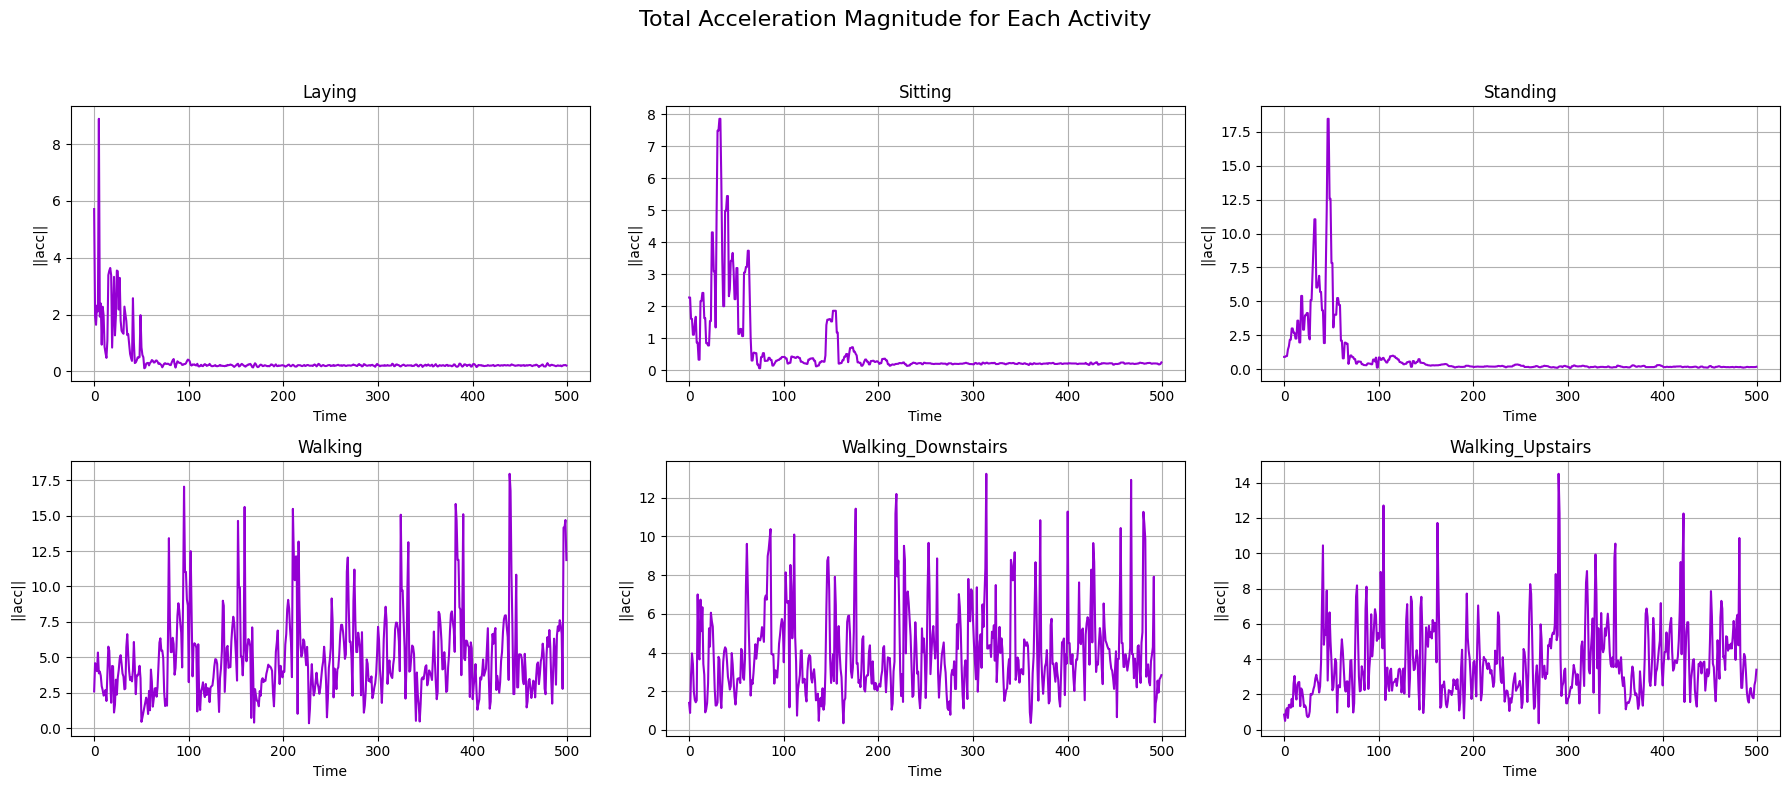

In [41]:
plt.figure(figsize=(18, 8))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]
    total_acc = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)

    plt.subplot(2, 3, i + 1)
    plt.plot(total_acc, color='darkviolet')
    plt.title(f"{activity}")
    plt.xlabel("Time")
    plt.ylabel("||acc||")
    plt.grid(True)

plt.suptitle("Total Acceleration Magnitude for Each Activity", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


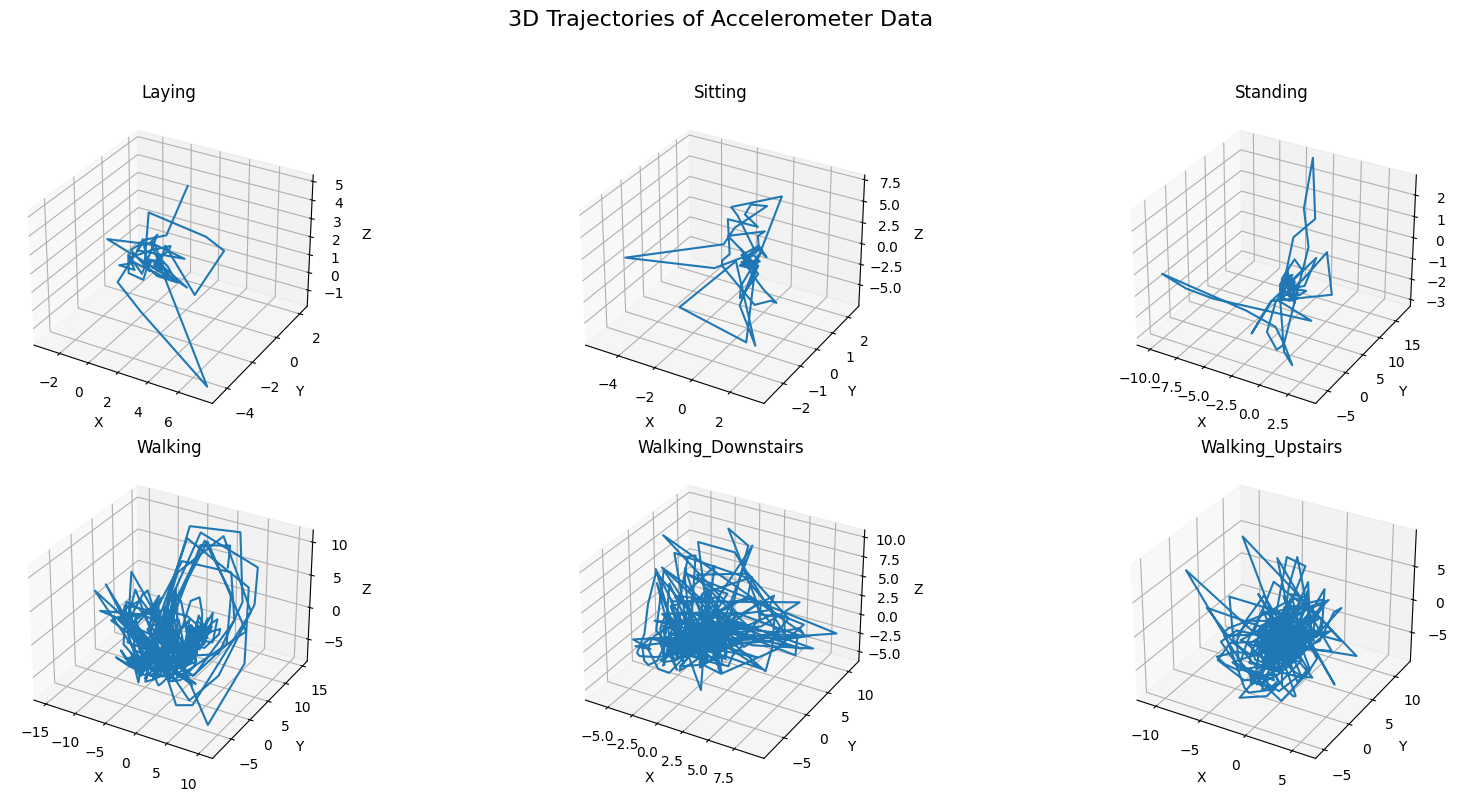

In [40]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 8))

for i, activity in enumerate(activities):
    path = os.path.join(base_path, activity)
    file = os.listdir(path)[0]
    df = pd.read_csv(os.path.join(path, file), header=None)

    df = df.apply(pd.to_numeric, errors='coerce')
    df.dropna(inplace=True)
    df.columns = ['acc_x', 'acc_y', 'acc_z'][:df.shape[1]]

    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(df['acc_x'], df['acc_y'], df['acc_z'])
    ax.set_title(activity)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.suptitle("3D Trajectories of Accelerometer Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
